## Importacion de Librerias y Carga de Datos

In [119]:
# importacion de librerias

import pandas as pd

In [120]:
pd.set_option('display.max_columns', None)

In [121]:
df = pd.read_csv("datasets/propiedades_merged_all.csv")

df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Servicio,Garage,Calefacción,Cocina,Año de Construcción,Jardín,Dormitorios Suite,Piscina,Orientación,Plantas,Parrillero,Acepta Mascotas,Superficie Balcones,Disposición,Pisos Edificio,Lavadero,Seguridad,Altura,Aptos por piso,Patio,Muebles,Propiedad Horizontal,Gastos Comúnes,Piso,Ascensor
0,https://www.casasymas.com.uy/propiedad/222586-casa-en-venta-de-5-dormitorios-en-punta-gorda-montevideo,U$S 580.000Venta,5,3,586 m²,195m²,586m²,Dormitorios de Servicio: 1,Garaje: 5,NaN,Cocina Definida,1960,Jardín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/194576-venta-casa-4-dormitorios-servicio-punta-gorda-ref-1879,U$S 850.000Venta,4,5,295 m²,277m²,594m²,Dormitorios de Servicio: 1,Garaje: 1,Losa radiante a gas,NaN,1941,Jardín,Dormitorios en Suite: 1,Piscina,Oeste,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo,U$S 675.000Venta,4,4,NaN,242m²,268m²,NaN,Garaje: 2,NaN,NaN,NaN,Jardín,NaN,NaN,NaN,3,Parrillero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.casasymas.com.uy/propiedad/227830-casa-en-venta-c-cochera-en-punta-carretas,U$S 298.000Venta,3,2,104 m²,94m²,10m²,NaN,Garaje: 1,NaN,NaN,1930,NaN,NaN,NaN,NaN,NaN,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.casasymas.com.uy/propiedad/212637-casa-en-venta-de-2-dormitorios-en-belvedere,U$S 148.000Venta,2,2,131 m²,98m²,131m²,NaN,Garaje: 1,NaN,Cocina Integrada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    2446 non-null   object 
 1   precio                 2446 non-null   object 
 2   Dormitorios            2446 non-null   object 
 3   Baños                  2373 non-null   float64
 4   Superficie             2233 non-null   object 
 5   Superficie Construida  2258 non-null   object 
 6   Superficie Terreno     1969 non-null   object 
 7   Dormitorios Servicio   434 non-null    object 
 8   Garage                 1647 non-null   object 
 9   Calefacción            274 non-null    object 
 10  Cocina                 1745 non-null   object 
 11  Año de Construcción    1609 non-null   float64
 12  Jardín                 1025 non-null   object 
 13  Dormitorios Suite      559 non-null    object 
 14  Piscina                427 non-null    object 
 15  Orie

# Limpieza de datos

## Eliminamos duplicados del dataset

In [123]:
# vemos los duplicados que hay en el dataset 

duplicados = df.duplicated(subset=['url'])
print(f'Duplicados encontrados por URL: {duplicados.sum()}')

Duplicados encontrados por URL: 0


In [124]:
# dropeamos los duplicados del dataset por url 

df = df.drop_duplicates(subset='url')

## DROP DE COLUMNAS -- CRITERIO 

Vamos a dropear todas las columnas que tengan menos de 650 datos como criterio inicial. Luego podemos ver de cambiarlo, pero eso será el criterio inicial. 

In [125]:
# Calcular el número de valores no nulos por columna
non_null_counts = df.notnull().sum()

# Identificar las columnas a eliminar (non-null count < 650)
columns_to_drop = non_null_counts[non_null_counts < 650].index

# Eliminar las columnas identificadas
df = df.drop(columns=columns_to_drop)

# Mostrar las columnas restantes
print("Columnas restantes:", df.columns)

Columnas restantes: Index(['url', 'precio', 'Dormitorios', 'Baños', 'Superficie',
       'Superficie Construida', 'Superficie Terreno', 'Garage', 'Cocina',
       'Año de Construcción', 'Jardín', 'Orientación', 'Plantas',
       'Acepta Mascotas'],
      dtype='object')


In [126]:
print(columns_to_drop)

Index(['Dormitorios Servicio', 'Calefacción', 'Dormitorios Suite', 'Piscina',
       'Parrillero', 'Superficie Balcones', 'Disposición', 'Pisos Edificio',
       'Lavadero', 'Seguridad', 'Altura', 'Aptos por piso', 'Patio', 'Muebles',
       'Propiedad Horizontal', 'Gastos Comúnes', 'Piso', 'Ascensor'],
      dtype='object')


In [127]:
df.head()

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Cocina,Año de Construcción,Jardín,Orientación,Plantas,Acepta Mascotas
0,https://www.casasymas.com.uy/propiedad/222586-casa-en-venta-de-5-dormitorios-en-punta-gorda-montevideo,U$S 580.000Venta,5,3,586 m²,195m²,586m²,Garaje: 5,Cocina Definida,1960,Jardín,NaN,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/194576-venta-casa-4-dormitorios-servicio-punta-gorda-ref-1879,U$S 850.000Venta,4,5,295 m²,277m²,594m²,Garaje: 1,NaN,1941,Jardín,Oeste,2,NaN
2,https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo,U$S 675.000Venta,4,4,NaN,242m²,268m²,Garaje: 2,NaN,NaN,Jardín,NaN,3,NaN
3,https://www.casasymas.com.uy/propiedad/227830-casa-en-venta-c-cochera-en-punta-carretas,U$S 298.000Venta,3,2,104 m²,94m²,10m²,Garaje: 1,NaN,1930,NaN,NaN,NaN,Acepta Mascotas
4,https://www.casasymas.com.uy/propiedad/212637-casa-en-venta-de-2-dormitorios-en-belvedere,U$S 148.000Venta,2,2,131 m²,98m²,131m²,Garaje: 1,Cocina Integrada,NaN,NaN,NaN,NaN,Acepta Mascotas


In [128]:
df = df.drop(columns=['Dormitorios Suite', 'Orientación', 'Cocina', 'Año de Construcción', 'Disposición'], errors='ignore')

In [129]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'superficie_construida' y 'superficie_terreno'

# Filtrar las filas que tienen NaN en 'superficie_construida' o 'superficie_terreno'
filas_con_nan = df[df[['Superficie Construida', 'Superficie Terreno', 'Superficie']].isnull().any(axis=1)]

# print(filas_con_nan.value_counts())

# Mostrar las filas con NaN
print(filas_con_nan)

                                                                                                                                                                 url  \
2                                                           https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo   
7                                                                 https://www.casasymas.com.uy/propiedad/90237-casa-en-venta-de-2-dormitorios-en-carrasco-montevideo   
8                                                                 https://www.casasymas.com.uy/propiedad/186448-casa-en-venta-de-4-dormitorios-en-pocitos-montevideo   
11                                                                              https://www.casasymas.com.uy/propiedad/212558-venta-casa-carrasco-sur-proximo-rambla   
18                                                             https://www.casasymas.com.uy/propiedad/228806-local-con-galpon-vivienda-3-dorm-con-entrada-indivi

## Registros fuera de criterios

Criterios: 

* Dormitorios: no mas de 10
* Baños: no mas de 5
* Garage: no mas de 5

In [130]:
df.head()

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Jardín,Plantas,Acepta Mascotas
0,https://www.casasymas.com.uy/propiedad/222586-casa-en-venta-de-5-dormitorios-en-punta-gorda-montevideo,U$S 580.000Venta,5,3,586 m²,195m²,586m²,Garaje: 5,Jardín,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/194576-venta-casa-4-dormitorios-servicio-punta-gorda-ref-1879,U$S 850.000Venta,4,5,295 m²,277m²,594m²,Garaje: 1,Jardín,2,NaN
2,https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo,U$S 675.000Venta,4,4,NaN,242m²,268m²,Garaje: 2,Jardín,3,NaN
3,https://www.casasymas.com.uy/propiedad/227830-casa-en-venta-c-cochera-en-punta-carretas,U$S 298.000Venta,3,2,104 m²,94m²,10m²,Garaje: 1,NaN,NaN,Acepta Mascotas
4,https://www.casasymas.com.uy/propiedad/212637-casa-en-venta-de-2-dormitorios-en-belvedere,U$S 148.000Venta,2,2,131 m²,98m²,131m²,Garaje: 1,NaN,NaN,Acepta Mascotas


In [131]:
# Convert columns to numeric, replacing errors with NaN
df['Dormitorios'] = pd.to_numeric(df['Dormitorios'], errors='coerce')
df['Garage'] = pd.to_numeric(df['Garage'], errors='coerce')

# Now you can filter
filtered_data = df[(df['Dormitorios'] > 10) | (df['Baños'] > 5) | (df['Garage'] > 5)]

print(f"Cantidad de filas a sacar: {len(filtered_data)}")

Cantidad de filas a sacar: 124


In [132]:
# Identificamos las filas a eliminar (las que tienen valores extremos)
rows_to_drop = df[(df['Dormitorios'] >= 10) | (df['Baños'] >= 5) | (df['Garage'] >= 5)].index

print(f"Filas a eliminar: {len(rows_to_drop)}")

# Eliminamos esas filas
df = df.drop(rows_to_drop)

print(f"Filas restantes: {len(df)}")
df.head(5)

Filas a eliminar: 267
Filas restantes: 2179


,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Jardín,Plantas,Acepta Mascotas
0,https://www.casasymas.com.uy/propiedad/222586-casa-en-venta-de-5-dormitorios-en-punta-gorda-montevideo,U$S 580.000Venta,5,3,586 m²,195m²,586m²,NaN,Jardín,NaN,NaN
2,https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo,U$S 675.000Venta,4,4,NaN,242m²,268m²,NaN,Jardín,3,NaN
3,https://www.casasymas.com.uy/propiedad/227830-casa-en-venta-c-cochera-en-punta-carretas,U$S 298.000Venta,3,2,104 m²,94m²,10m²,NaN,NaN,NaN,Acepta Mascotas
4,https://www.casasymas.com.uy/propiedad/212637-casa-en-venta-de-2-dormitorios-en-belvedere,U$S 148.000Venta,2,2,131 m²,98m²,131m²,NaN,NaN,NaN,Acepta Mascotas
5,https://www.casasymas.com.uy/propiedad/225135-venta-casa-4-dormitorios-3-banos-y-cochera-en-carrasco-sur-montevideo,U$S 625.000Venta,4,3,408 m²,234m²,174m²,NaN,Jardín,NaN,Acepta Mascotas


## Limpieza de campos 

Algunos campos tienen incoherencias entonces queremos dejarlos lo mas limpio posibles para nuestro analisis. 

In [133]:
# columna "precio" -> eliminamos el "U$S" y "Venta"

df['precio'] = df['precio'].str.replace("U\\$S", "", regex=True)
df['precio'] = df['precio'].str.replace("Venta", "", regex=True)
df['precio'] = df['precio'].str.replace(".", "", regex=False)
df['precio'] = df['precio'].str.strip()
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')

print(df['precio'].head())

0   580000
2   675000
3   298000
4   148000
5   625000
Name: precio, dtype: float64


In [134]:
# columna "dormitorio" -> cambiamos "Monoambiente" por 0. 

df['Dormitorios'] = df['Dormitorios'].replace("Monoambiente", 0)
df['Dormitorio'] = pd.to_numeric(df['Dormitorios'], errors='coerce')

df = df.drop(columns=['Dormitorios'])

In [135]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Construida'] = df['Superficie Construida'].str.replace("mÂ²", "", regex=False)
df['Superficie Construida'] = df['Superficie Construida'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Construida'] = df["Superficie Construida"].str.strip()

# convertir a numero 

df['Superficie Construida'] = pd.to_numeric(df['Superficie Construida'], errors='coerce')

In [136]:
# columna "Superficie Terreno" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("mÂ²", "", regex=False)
df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Terreno'] = df["Superficie Terreno"].str.strip()

# convertir a numero 

df['Superficie Terreno'] = pd.to_numeric(df['Superficie Terreno'], errors='coerce')

In [137]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie'] = df['Superficie'].str.replace("mÂ²", "", regex=False)
df['Superficie'] = df['Superficie'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie'] = df["Superficie"].str.strip()

# convertir a numero 

df['Superficie'] = pd.to_numeric(df['Superficie'], errors='coerce')

In [138]:
# reemplazar en garage los NaN por 0

# Reemplazar vacíos o NaN por 0
df['Garage'] = df['Garage'].fillna(0)

# Extraer solo el número
df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')

# Reemplazar cualquier valor faltante con 0 y convertir a número
df['Garage'] = df['Garage'].fillna(0).astype(int)

<>:7: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:7: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
/var/folders/jb/mrvrxpj536q3c07jmkq2z00c0000gn/T/ipykernel_18437/4221029522.py:7: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')


In [139]:
# drop de filas con NaN en precio

df = df[df['precio'].notna()]

In [140]:
# chequeamos que no quede nada con NaN en precio

df[df['precio'].isna()]

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Jardín,Plantas,Acepta Mascotas,Dormitorio


In [141]:
# eliminar chacras del dataset 

rows_to_drop = df[df['Superficie Terreno'] > 20000].index

df = df.drop(rows_to_drop)

df.head(10)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Jardín,Plantas,Acepta Mascotas,Dormitorio
0,https://www.casasymas.com.uy/propiedad/222586-casa-en-venta-de-5-dormitorios-en-punta-gorda-montevideo,580000,3,586,195,586,0,Jardín,NaN,NaN,5
2,https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo,675000,4,NaN,242,268,0,Jardín,3,NaN,4
3,https://www.casasymas.com.uy/propiedad/227830-casa-en-venta-c-cochera-en-punta-carretas,298000,2,104,94,10,0,NaN,NaN,Acepta Mascotas,3
4,https://www.casasymas.com.uy/propiedad/212637-casa-en-venta-de-2-dormitorios-en-belvedere,148000,2,131,98,131,0,NaN,NaN,Acepta Mascotas,2
5,https://www.casasymas.com.uy/propiedad/225135-venta-casa-4-dormitorios-3-banos-y-cochera-en-carrasco-sur-montevideo,625000,3,408,234,174,0,Jardín,NaN,Acepta Mascotas,4
6,https://www.casasymas.com.uy/propiedad/225720-venta-casa-3-dormitorios-carrasco,580000,2,285,156,201,0,Jardín,NaN,NaN,3
7,https://www.casasymas.com.uy/propiedad/90237-casa-en-venta-de-2-dormitorios-en-carrasco-montevideo,203400,2,NaN,60,NaN,0,Jardín,NaN,NaN,2
8,https://www.casasymas.com.uy/propiedad/186448-casa-en-venta-de-4-dormitorios-en-pocitos-montevideo,670000,4,NaN,249,321,0,Jardín,2,Acepta Mascotas,4
9,https://www.casasymas.com.uy/propiedad/225721-venta-casa-3-dormitorios-carrasco,620000,2,360,155,278,0,Jardín,NaN,NaN,3
10,https://www.casasymas.com.uy/propiedad/179495-casa-en-venta-de-4-dormitorios-con-garage-en-pocitos-montevideo,335000,2,137,137,164,0,NaN,3,Acepta Mascotas,4


## AGREGAR BARRIOS 

In [142]:
barrios = {
    "aguada": "B",
    "aires-puros": "C", 
    "atahualpa": "C", 
    "banados-de-carrasco": "F", 
    "barrio-sur": "B", 
    "belvedere": "A",
    "brazo-oriental": "C", 
    "buceo": "CH", 
    "bella-vista": "C", 
    "capurro": "C", 
    "carrasco": "E", 
    "carrasco-norte": "E", 
    "casabo": "A", 
    "pajas-blancas": "A", 
    "casavalle": "D", 
    "castro": "D", 
    "perez-castellanos": "D", 
    "centro": "B", 
    "cerrito": "D",
    "cerro": "A", 
    "ciudad-vieja": "B", 
    "colon": "G", 
    "conciliacion": "G", 
    "cordon": "B", 
    "abayuba": "G", 
    "flor-de-maronas": "F", 
    "ituzaingo": "F", 
    "jacinto-vera": "C", 
    "jardines-del-hipodromo": "F", 
    "la-paloma": "A", 
    "la-teja": "A", 
    "larranaga": "C", 
    "las-acacias": "D", 
    "las-canteras": "E", 
    "lezica": "G", 
    "melilla": "G", 
    "malvin": "E", 
    "malvin-norte": "E", 
    "paso-de-las-duranas": "G",
    "manga": "F", 
    "toledo-chico": "D", 
    "maronas": "F", 
    "parque-guarani": "F",
    "mercado-modelo": "C", 
    "bolivar": "C", 
    "nuevo-paris": "A", 
    "palermo": "B", 
    "parque-batlle": "CH", 
    "villa-dolores": "CH", 
    "parque-rodo": "B", 
    "paso-de-la-arena": "A", 
    "penarol": "G", 
    "lavalleja": "G", 
    "piedras-blancas": "D",
    "pocitos": "CH", 
    "prado": "A", 
    "nueva-savona": "A", 
    "punta-carretas": "CH", 
    "punta-gorda": "E", 
    "punta-rieles": "F", 
    "bella-italia": "F", 
    "reducto": "C", 
    "sayago": "G", 
    "tres-cruces": "B",  
    "tres-ombues": "A", 
    "victoria": "A",
    "union": "D", 
    "villa-espanola": "D", 
    "villa-garcia": "F", 
    "villa-munoz": "C", 
    "paso-molino": "A", 
    "la-comercial": "B",
    "san-nicolas": "E", 
    "goes": "C", 
    "parque-rivera": "E", 
    "la-blanqueada": "CH", 
    "la-figurita": "C"
}

barrios_sorted = sorted(barrios, key=len, reverse = True)

def extraer_barrios_de_url(url: str) -> str | None:
    for barrio in barrios_sorted:
        if barrio in url: 
            return barrio
    return None

df["barrio"] = df["url"].apply(extraer_barrios_de_url)
df["municipio"] = df["barrio"].map(barrios)


In [143]:
# Cuenta la cantidad de nulos en la columna barrio
num_nulos = df["barrio"].isna().sum()

print("Cantidad de nulos en 'barrio':", num_nulos)

Cantidad de nulos en 'barrio': 190


In [144]:
df = df.dropna(subset=["barrio"]).reset_index(drop=True)

In [145]:
# Cuenta la cantidad de nulos en la columna barrio
num_nulos = df["barrio"].isna().sum()

print("Cantidad de nulos en 'barrio':", num_nulos)

Cantidad de nulos en 'barrio': 0


## AGREGAR COLUMNA BARRIO 

In [146]:
barrios = df['url']

print(barrios)

0                                                                                            https://www.casasymas.com.uy/propiedad/222586-casa-en-venta-de-5-dormitorios-en-punta-gorda-montevideo
1                                                                                          https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo
2                                                                                                           https://www.casasymas.com.uy/propiedad/227830-casa-en-venta-c-cochera-en-punta-carretas
3                                                                                                         https://www.casasymas.com.uy/propiedad/212637-casa-en-venta-de-2-dormitorios-en-belvedere
4                                                                               https://www.casasymas.com.uy/propiedad/225135-venta-casa-4-dormitorios-3-banos-y-cochera-en-carrasco-sur-montevideo
5                   

## Export dataset

In [147]:
df.head(5)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Jardín,Plantas,Acepta Mascotas,Dormitorio,barrio,municipio
0,https://www.casasymas.com.uy/propiedad/222586-casa-en-venta-de-5-dormitorios-en-punta-gorda-montevideo,580000,3,586,195,586,0,Jardín,NaN,NaN,5,punta-gorda,E
1,https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo,675000,4,NaN,242,268,0,Jardín,3,NaN,4,parque-batlle,CH
2,https://www.casasymas.com.uy/propiedad/227830-casa-en-venta-c-cochera-en-punta-carretas,298000,2,104,94,10,0,NaN,NaN,Acepta Mascotas,3,punta-carretas,CH
3,https://www.casasymas.com.uy/propiedad/212637-casa-en-venta-de-2-dormitorios-en-belvedere,148000,2,131,98,131,0,NaN,NaN,Acepta Mascotas,2,belvedere,A
4,https://www.casasymas.com.uy/propiedad/225135-venta-casa-4-dormitorios-3-banos-y-cochera-en-carrasco-sur-montevideo,625000,3,408,234,174,0,Jardín,NaN,Acepta Mascotas,4,carrasco,E


In [148]:
df.to_excel('datasets/final_dataset_merged_features_originales.xlsx', index=False)

# COMIENZA EDA

In [94]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [95]:
df.describe()

,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Plantas,Dormitorio
count,1974,1910,1810,1815,1557,1974,541,1940
mean,387295,2,310,176,372,0,2,3
std,331606,1,418,114,648,0,1,1
min,335,1,10,10,1,0,1,1
25%,168000,1,124,99,120,0,1,3
50%,289500,2,206,145,229,0,2,3
75%,490000,3,357,220,456,0,2,4
max,2500000,4,9504,900,9404,0,4,9


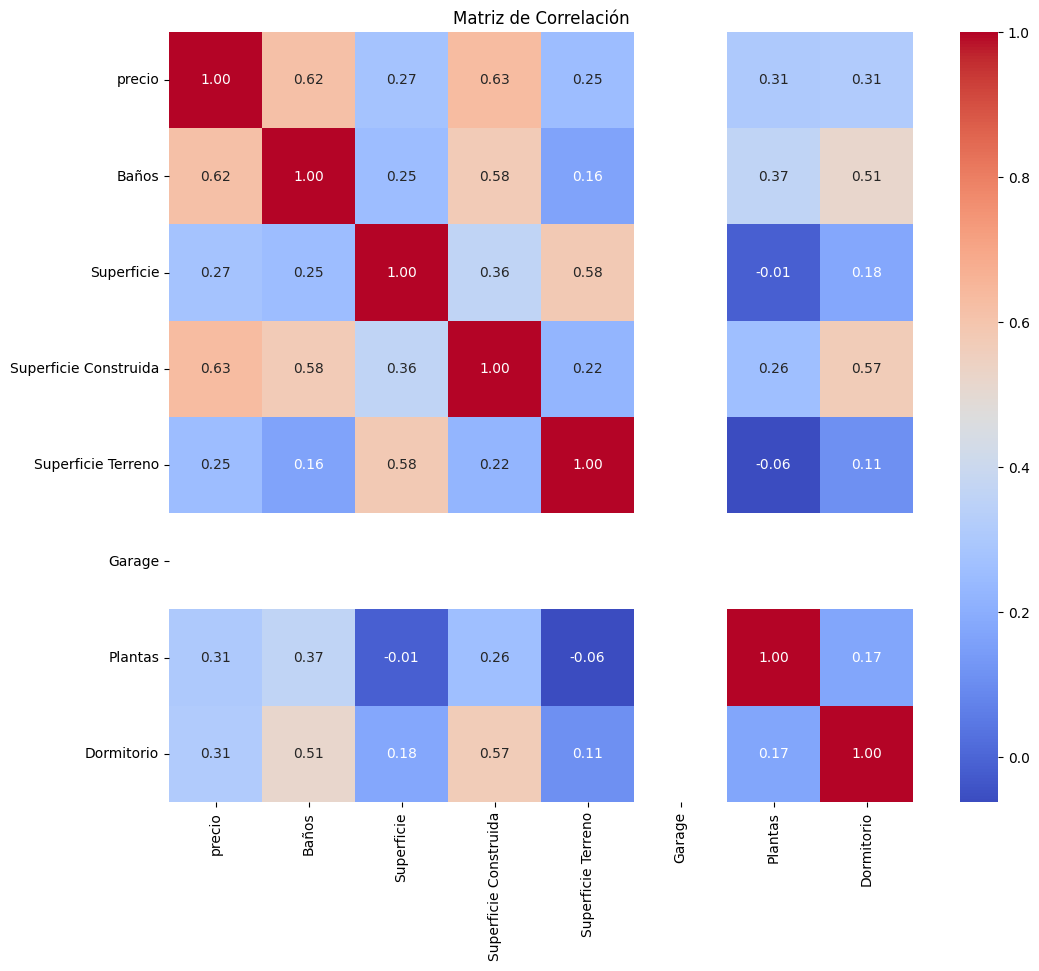

In [96]:
numeric_df = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación usando solo las columnas numéricas
correlation_matrix = numeric_df.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Muestra el gráfico
plt.title('Matriz de Correlación')
plt.show()

## Boxplots

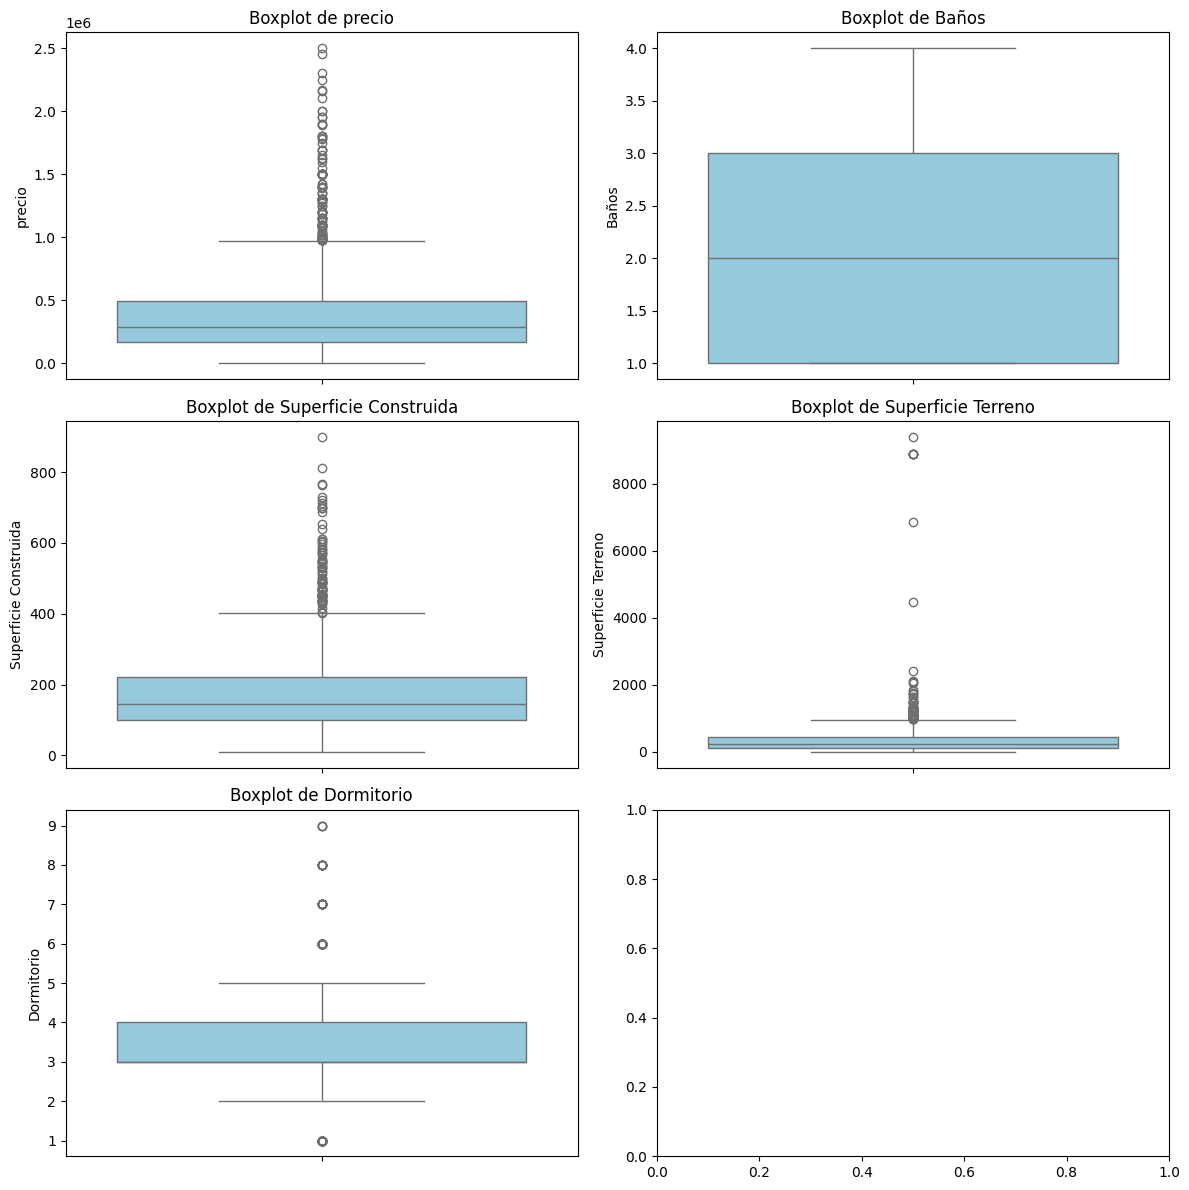

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas a graficar
columnas_interes = ['precio', 'Baños', 'Superficie Construida',
                    'Superficie Terreno', 'Dormitorio']

# Crear figura con 3 filas y 2 columnas
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Aplanar los ejes para iterar más fácil
axes = axes.flatten()

# Crear cada boxplot de forma individual
for ax, col in zip(axes, columnas_interes):
    sns.boxplot(y=df[col], ax=ax, color="skyblue")
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel("")  # quitar etiqueta del eje X
    ax.set_ylabel(col)

# Ajustar espacios
plt.tight_layout()

# Mostrar gráfico
plt.show()


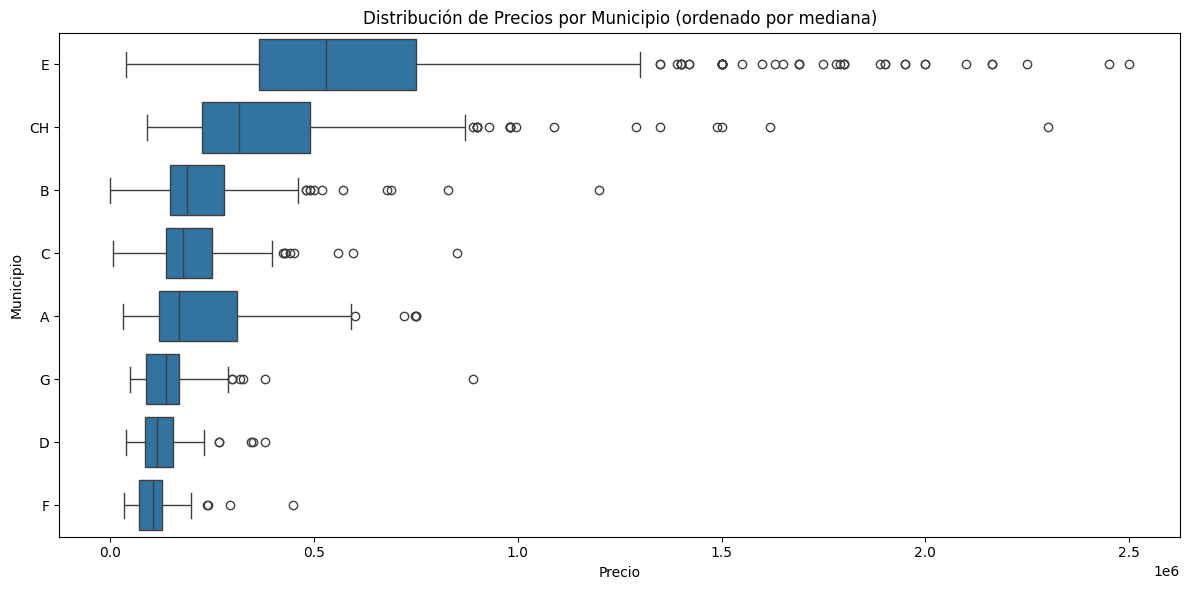

In [98]:
# Calcular mediana del precio por municipio
orden_municipios = (df.groupby("municipio")["precio"].median().sort_values(ascending=False).index)

# Crear boxplot ordenado por mediana
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="precio",
    y="municipio",
    data=df,
    order=orden_municipios
)

plt.title("Distribución de Precios por Municipio (ordenado por mediana)")
plt.xlabel("Precio")
plt.ylabel("Municipio")

plt.tight_layout()
plt.show()


## Cantidad de datos por municipio

In [99]:
# Asegúrate de que 'df' es tu DataFrame y 'municipio' es la columna que contiene los municipios
cantidad_por_municipio = df['municipio'].value_counts()

# Mostrar la cantidad de datos por municipio
print(cantidad_por_municipio)

municipio
E     721
CH    384
B     258
A     213
C     196
G      85
D      75
F      42
Name: count, dtype: int64


## Precio m2

basado en superficie contruida y en superficie terreno.

In [100]:
df.head(5)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Jardín,Plantas,Acepta Mascotas,Dormitorio,barrio,municipio
0,https://www.casasymas.com.uy/propiedad/222586-casa-en-venta-de-5-dormitorios-en-punta-gorda-montevideo,580000,3,586,195,586,0,Jardín,NaN,NaN,5,punta-gorda,E
1,https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo,675000,4,NaN,242,268,0,Jardín,3,NaN,4,parque-batlle,CH
2,https://www.casasymas.com.uy/propiedad/227830-casa-en-venta-c-cochera-en-punta-carretas,298000,2,104,94,10,0,NaN,NaN,Acepta Mascotas,3,punta-carretas,CH
3,https://www.casasymas.com.uy/propiedad/212637-casa-en-venta-de-2-dormitorios-en-belvedere,148000,2,131,98,131,0,NaN,NaN,Acepta Mascotas,2,belvedere,A
4,https://www.casasymas.com.uy/propiedad/225135-venta-casa-4-dormitorios-3-banos-y-cochera-en-carrasco-sur-montevideo,625000,3,408,234,174,0,Jardín,NaN,Acepta Mascotas,4,carrasco,E


In [101]:
# Asegúrate de que 'df' tiene las columnas 'precio', 'superficie_construida' y 'superficie_terreno'

# Calcular el precio por metro cuadrado basado en la superficie construida
df['precio_por_m2_construido'] = df['precio'] / df['Superficie Construida']

# Calcular el precio por metro cuadrado basado en la superficie del terreno
df['precio_por_m2_terreno'] = df['precio'] / df['Superficie Terreno']

df['precio_por_m2'] = df['precio'] / df['Superficie']

# Mostrar las nuevas columnas
print(df[['precio', 'Superficie Construida', 'precio_por_m2_construido', 'Superficie Terreno', 'precio_por_m2_terreno']])

      precio  Superficie Construida  precio_por_m2_construido  \
0     580000                    195                      2974   
1     675000                    242                      2789   
2     298000                     94                      3170   
3     148000                     98                      1510   
4     625000                    234                      2671   
5     580000                    156                      3718   
6     203400                     60                      3390   
7     670000                    249                      2691   
8     620000                    155                      4000   
9     335000                    137                      2445   
10    190000                    145                      1310   
11   1780000                    263                      6768   
12    230000                     98                      2347   
13     90000                     61                      1475   
14    895000             

In [102]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'superficie_construida' y 'superficie_terreno'

# Filtrar las filas que tienen NaN en 'superficie_construida' o 'superficie_terreno'
filas_con_nan = df[df[['Superficie Construida', 'Superficie Terreno']].isnull().any(axis=1)]

# Mostrar las filas con NaN
print(filas_con_nan)

                                                                                                                                                                 url  \
6                                                                 https://www.casasymas.com.uy/propiedad/90237-casa-en-venta-de-2-dormitorios-en-carrasco-montevideo   
17                                                                       https://www.casasymas.com.uy/propiedad/226114-casa-en-venta-de-1-dormitorio-en-jacinto-vera   
27                                                                            https://www.casasymas.com.uy/propiedad/225910-casa-en-venta-de-2-dormitorios-en-malvin   
36                                                                                    https://www.casasymas.com.uy/propiedad/123654-venta-casa-pocitos-4-dormitorios   
37                                                                 https://www.casasymas.com.uy/propiedad/196086-casa-en-venta-de-4-dormitorios-en-malvin-montev

## Precio promedio por municipio

In [103]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio'

# Calcular el precio promedio por municipio
precio_promedio_por_municipio = df.groupby('municipio')['precio'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_municipio = pd.DataFrame({
    'precio_promedio': precio_promedio_por_municipio,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio
resultado_municipio = resultado_municipio.sort_values(by='precio_promedio', ascending=False)

# Mostrar el resultado
print(resultado_municipio)

           precio_promedio  cantidad_propiedades
municipio                                       
E                   613185                   721
CH                  390472                   384
B                   225778                   258
A                   212878                   213
C                   208254                   196
G                   154347                    85
D                   131860                    75
F                   120267                    42


In [104]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_construido'

# Calcular el precio promedio por m2 construido por municipio
precio_promedio_por_m2_construido = df.groupby('municipio')['precio_por_m2_construido'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_m2_municipio = pd.DataFrame({
    'precio_promedio_por_m2': precio_promedio_por_m2_construido,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio por m2
resultado_m2_municipio = resultado_m2_municipio.sort_values(by='precio_promedio_por_m2', ascending=False)

# Mostrar el resultado
print(resultado_m2_municipio)

           precio_promedio_por_m2  cantidad_propiedades
municipio                                              
E                            3174                   721
A                            2624                   213
CH                           2424                   384
C                            1557                   196
B                            1442                   258
D                            1319                    75
G                            1241                    85
F                            1161                    42


In [105]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_terreno'

# Calcular el precio promedio por m2 terreno por municipio
precio_promedio_por_m2_terreno = df.groupby('municipio')['precio_por_m2_terreno'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_m2_terreno_municipio = pd.DataFrame({
    'precio_promedio_por_m2_terreno': precio_promedio_por_m2_terreno,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio por m2 terreno
resultado_m2_terreno_municipio = resultado_m2_terreno_municipio.sort_values(by='precio_promedio_por_m2_terreno', ascending=False)

# Mostrar el resultado
print(resultado_m2_terreno_municipio)

           precio_promedio_por_m2_terreno  cantidad_propiedades
municipio                                                      
CH                                   5512                   384
C                                    2412                   196
E                                    2277                   721
B                                    2252                   258
A                                    1667                   213
D                                    1331                    75
G                                     583                    85
F                                     521                    42


## Lo mismo por barrios

In [106]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'barrio' y 'precio'

# Calcular el precio promedio por barrio
precio_promedio_por_barrios = df.groupby('barrio')['precio'].mean()

# Calcular la cantidad de propiedades por barrio
cantidad_propiedades_por_barrio = df.groupby('barrio').size()

# Combinar ambos resultados en un DataFrame
resultado = pd.DataFrame({
    'precio_promedio': precio_promedio_por_barrios,
    'cantidad_propiedades': cantidad_propiedades_por_barrio
})

# Ordenar de mayor a menor por precio promedio
resultado = resultado.sort_values(by='precio_promedio', ascending=False)

# Mostrar el resultado sin decimales
print(resultado.round(0).astype(int))

                        precio_promedio  cantidad_propiedades
barrio                                                       
san-nicolas                     1199926                    31
carrasco                         745984                   323
punta-gorda                      617102                    88
punta-carretas                   587204                    49
villa-dolores                    465000                     2
pocitos                          461636                   118
carrasco-norte                   433213                   149
parque-batlle                    421122                    49
malvin                           397287                    94
parque-rivera                    388333                     3
larranaga                        335750                     4
parque-rodo                      331312                    24
abayuba                          319000                     1
prado                            301456                   102
atahualp

In [107]:
# Configurar pandas para mostrar números sin decimales
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'barrio' y 'precio_por_m2_construido'

# Calcular el precio promedio por m2 construido por barrio
precio_promedio_por_m2_construido_barrios = df.groupby('barrio')['precio_por_m2_construido'].mean()

precio_promedio_por_m2_construido_barrios = precio_promedio_por_m2_construido_barrios.sort_values(ascending=False)

# Mostrar el precio promedio por barrio
print(precio_promedio_por_m2_construido_barrios)

barrio
san-nicolas              5308
prado                    4168
carrasco                 3447
carrasco-norte           3193
villa-dolores            2951
pocitos                  2649
punta-gorda              2612
punta-carretas           2611
buceo                    2464
malvin                   2421
parque-batlle            2383
parque-rivera            2110
atahualpa                2053
la-blanqueada            1963
larranaga                1914
parque-rodo              1822
tres-cruces              1754
malvin-norte             1726
barrio-sur               1725
brazo-oriental           1714
paso-de-las-duranas      1568
cordon                   1551
punta-rieles             1524
jacinto-vera             1490
mercado-modelo           1484
palermo                  1477
union                    1468
maronas                  1467
sayago                   1455
goes                     1448
la-figurita              1433
capurro                  1422
bolivar                  1416
vic

In [108]:
# Configurar pandas para mostrar números sin decimales
pd.set_option('display.float_format', '{:.0f}'.format)

# Calcular el precio promedio por metro cuadrado de terreno por barrio
precio_promedio_por_m2_terreno_barrios = df.groupby('barrio')['precio_por_m2_terreno'].mean()

# Ordenar de mayor a menor
precio_promedio_por_m2_terreno_barrios = precio_promedio_por_m2_terreno_barrios.sort_values(ascending=False)

# Mostrar el precio promedio por metro cuadrado de terreno por barrio
print(precio_promedio_por_m2_terreno_barrios)

barrio
buceo                    7045
pocitos                  6801
parque-batlle            6410
atahualpa                5652
punta-carretas           5059
brazo-oriental           3197
palermo                  3128
cordon                   3004
parque-rodo              2991
tres-cruces              2869
prado                    2644
tres-ombues              2538
punta-gorda              2505
larranaga                2489
bella-vista              2460
carrasco                 2396
carrasco-norte           2280
cerrito                  2250
san-nicolas              2239
malvin                   2121
centro                   1991
barrio-sur               1988
union                    1792
la-blanqueada            1760
reducto                  1619
jacinto-vera             1613
goes                     1424
villa-munoz              1409
la-figurita              1372
la-comercial             1250
aguada                   1206
paso-molino              1205
villa-dolores            1181
ciu

## Precio promedio por m2 construido, m2 terreno

In [109]:
df.head()

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Jardín,Plantas,Acepta Mascotas,Dormitorio,barrio,municipio,precio_por_m2_construido,precio_por_m2_terreno,precio_por_m2
0,https://www.casasymas.com.uy/propiedad/222586-casa-en-venta-de-5-dormitorios-en-punta-gorda-montevideo,580000,3,586,195,586,0,Jardín,NaN,NaN,5,punta-gorda,E,2974,990,990
1,https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo,675000,4,NaN,242,268,0,Jardín,3,NaN,4,parque-batlle,CH,2789,2519,NaN
2,https://www.casasymas.com.uy/propiedad/227830-casa-en-venta-c-cochera-en-punta-carretas,298000,2,104,94,10,0,NaN,NaN,Acepta Mascotas,3,punta-carretas,CH,3170,29800,2865
3,https://www.casasymas.com.uy/propiedad/212637-casa-en-venta-de-2-dormitorios-en-belvedere,148000,2,131,98,131,0,NaN,NaN,Acepta Mascotas,2,belvedere,A,1510,1130,1130
4,https://www.casasymas.com.uy/propiedad/225135-venta-casa-4-dormitorios-3-banos-y-cochera-en-carrasco-sur-montevideo,625000,3,408,234,174,0,Jardín,NaN,Acepta Mascotas,4,carrasco,E,2671,3592,1532


In [110]:
# Configurar pandas para mostrar todos los datos sin cortar
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.0f}'.format)

# Crear la tabla directamente con groupby y agg
tabla_completa = df.groupby('barrio').agg({
    'precio_por_m2': 'mean',
    'precio_por_m2_construido': 'mean',
    'precio_por_m2_terreno': 'mean',
    'url': 'count' 
}).rename(columns={'url': 'cantidad_propiedades'})

# Ordenar de mayor a menor por precio promedio
tabla_completa = tabla_completa.sort_values(by='precio_por_m2_construido', ascending=False)

# También puedes guardar en una variable para manipular después
df_tabla_barrios = tabla_completa.copy()

df_tabla_barrios.head(20)

,precio_por_m2,precio_por_m2_construido,precio_por_m2_terreno,cantidad_propiedades
barrio,,,,
san-nicolas,2575,5308,2239,31
prado,1609,4168,2644,102
carrasco,2596,3447,2396,323
carrasco-norte,2467,3193,2280,149
villa-dolores,2222,2951,1181,2
pocitos,2332,2649,6801,118
punta-gorda,2663,2612,2505,88
punta-carretas,2427,2611,5059,49
buceo,1821,2464,7045,82


## Boxplots

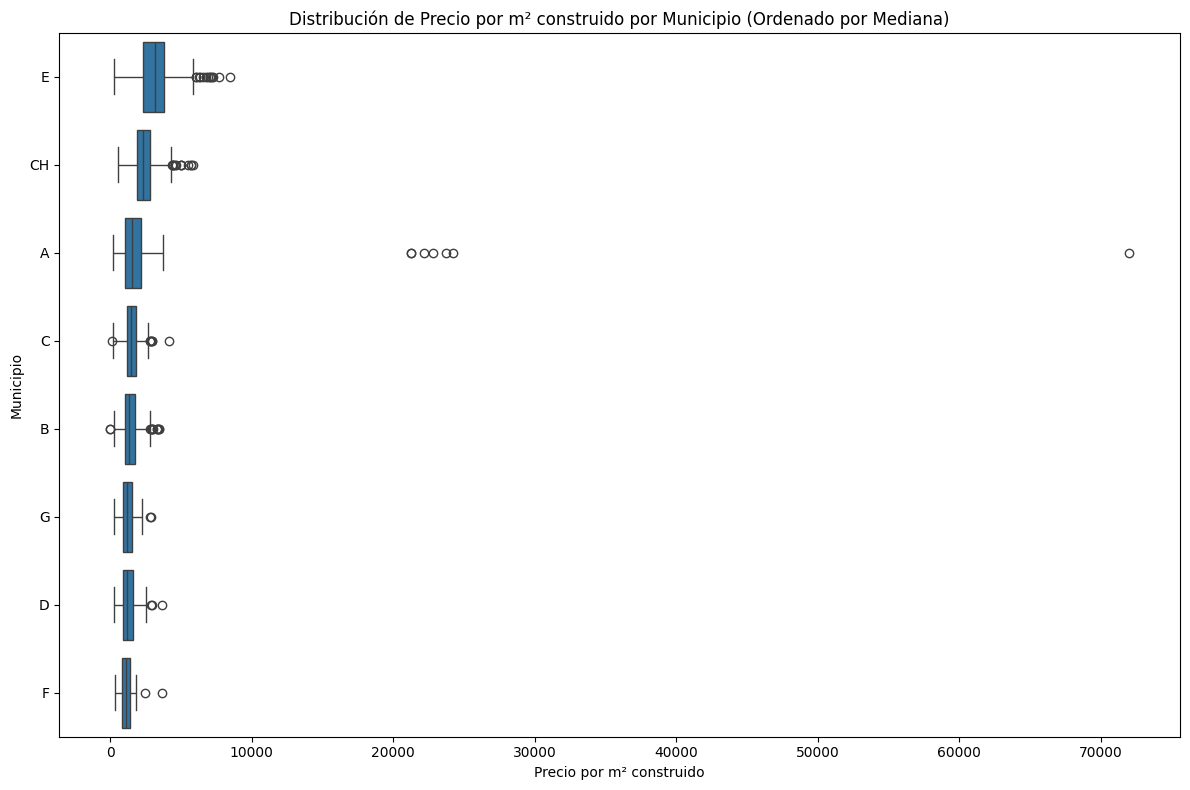

Medianas por municipio (ordenadas de mayor a menor):
municipio
E    3167
CH   2300
A    1510
C    1490
B    1331
G    1190
D    1174
F    1080
Name: precio_por_m2_construido, dtype: float64


In [111]:
# Configurar pandas para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_construido'

# Calcular la mediana por municipio para ordenar
mediana_por_municipio = df.groupby('municipio')['precio_por_m2_construido'].median().sort_values(ascending=False)

# Obtener el orden de los municipios (de mayor a menor mediana)
orden_municipios = mediana_por_municipio.index.tolist()

# Crear el boxplot con municipios ordenados en el eje Y por mediana
plt.figure(figsize=(12, 8))
sns.boxplot(y='municipio', x='precio_por_m2_construido', data=df, order=orden_municipios)

# Añadir título y etiquetas
plt.title('Distribución de Precio por m² construido por Municipio (Ordenado por Mediana)')
plt.xlabel('Precio por m² construido')
plt.ylabel('Municipio')

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Mostrar las medianas para verificar el orden
print("Medianas por municipio (ordenadas de mayor a menor):")
print(mediana_por_municipio)

In [112]:
# Filtrar solo el municipio A
df_municipio_a = df[df['municipio'] == 'A']

# Calcular Q1, Q3 e IQR para identificar outliers
Q1 = df_municipio_a['precio_por_m2_construido'].quantile(0.25)
Q3 = df_municipio_a['precio_por_m2_construido'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers (valores fuera de los límites)
outliers = df_municipio_a[
    (df_municipio_a['precio_por_m2_construido'] < lower_bound) | 
    (df_municipio_a['precio_por_m2_construido'] > upper_bound)
]

# Ordenar por precio_por_m2_construido de mayor a menor para ver los outliers superiores
outliers_sorted = outliers.sort_values('precio_por_m2_construido', ascending=False)

# Mostrar los 4 outliers principales
print(f"Total de outliers en municipio A: {len(outliers)}")
print("\nLos 4 outliers con mayor precio por m²:")
print(outliers_sorted[['url', 'precio_por_m2_construido', 'precio']].head(4))

# Si prefieres solo las URLs
print("\nURLs de los 4 outliers principales:")
for idx, url in enumerate(outliers_sorted['url'].head(4), 1):
    print(f"{idx}. {url}")

Total de outliers en municipio A: 7

Los 4 outliers con mayor precio por m²:
                                                                                                   url  \
160   https://www.casasymas.com.uy/propiedad/220073-casa-en-venta-de-4-dormitorios-en-prado-montevideo   
1130      https://www.casasymas.com.uy/propiedad/137357-casa-de-tres-dormitorios-en-venta-en-prado-009   
1967      https://www.casasymas.com.uy/propiedad/137356-casa-de-tres-dormitorios-en-venta-en-prado-010   
1184      https://www.casasymas.com.uy/propiedad/137355-casa-de-tres-dormitorios-en-venta-en-prado-014   

      precio_por_m2_construido  precio  
160                      72000  720000  
1130                     24250  388000  
1967                     23750  380000  
1184                     22812  365000  

URLs de los 4 outliers principales:
1. https://www.casasymas.com.uy/propiedad/220073-casa-en-venta-de-4-dormitorios-en-prado-montevideo
2. https://www.casasymas.com.uy/propiedad/137357-c

## Sacar Outliers dónde precio_por_m2_construido > 10,000

In [113]:
# Ver cuántas filas tienen precio_por_m2_construido > 10000
rows_to_remove = df[df['precio_por_m2_construido'] > 10000]
print(f"Filas a eliminar (precio_por_m2_construido > 10000): {len(rows_to_remove)}")

# Eliminar las filas donde precio_por_m2_construido > 10000
df = df[df['precio_por_m2_construido'] <= 10000]

print(f"Filas restantes después del filtrado: {len(df)}")

Filas a eliminar (precio_por_m2_construido > 10000): 7
Filas restantes después del filtrado: 1808


## Sacar de nuevo el ranking para ver como quedo 

In [114]:
# Calcular el precio promedio por m2 construido por municipio
precio_promedio_por_m2_construido = df.groupby('municipio')['precio_por_m2_construido'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_m2_municipio = pd.DataFrame({
    'precio_promedio_por_m2': precio_promedio_por_m2_construido,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio por m2
resultado_m2_municipio = resultado_m2_municipio.sort_values(by='precio_promedio_por_m2', ascending=False)

# Mostrar el resultado
print("Ranking de precio promedio por m² construido por municipio (actualizado):")
print(resultado_m2_municipio)

Ranking de precio promedio por m² construido por municipio (actualizado):
           precio_promedio_por_m2  cantidad_propiedades
municipio                                              
E                            3174                   677
CH                           2424                   351
A                            1596                   184
C                            1557                   183
B                            1442                   223
D                            1319                    69
G                            1241                    80
F                            1161                    41


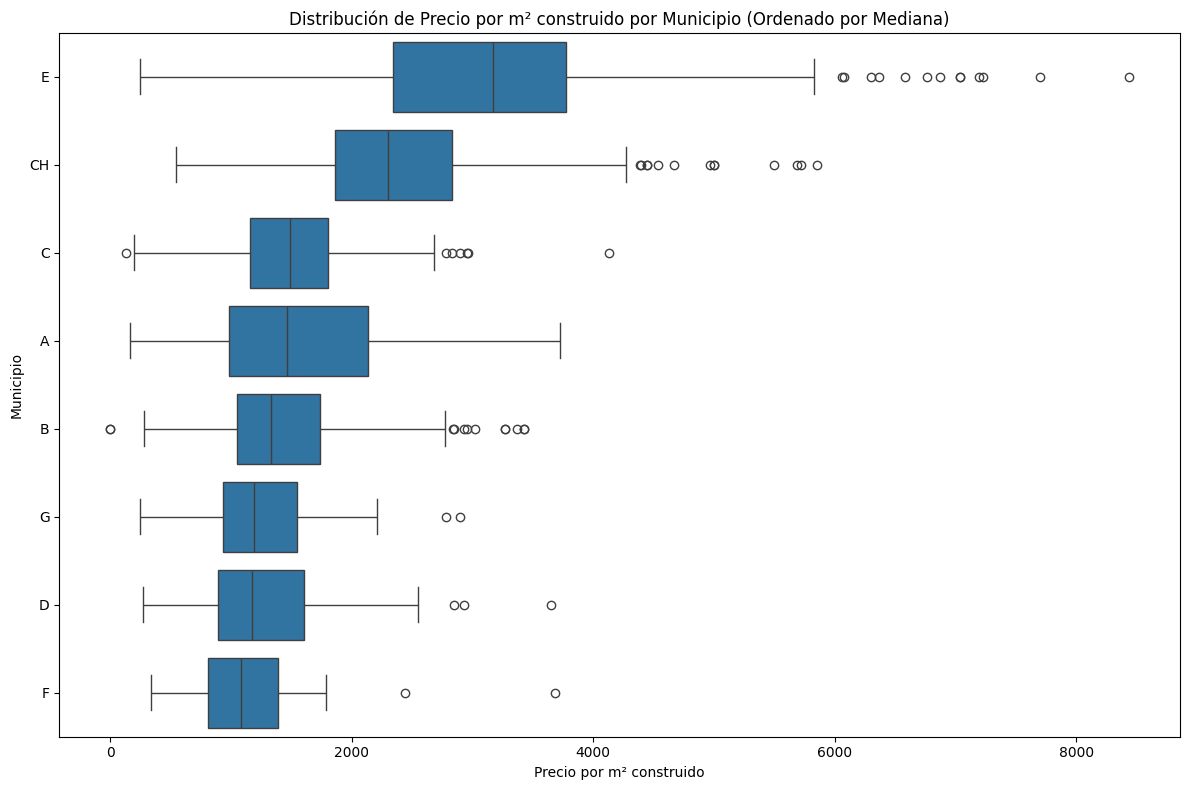

Medianas por municipio (ordenadas de mayor a menor):
municipio
E    3167
CH   2300
C    1490
A    1464
B    1331
G    1190
D    1174
F    1080
Name: precio_por_m2_construido, dtype: float64


In [115]:
# Configurar pandas para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_construido'

# Calcular la mediana por municipio para ordenar
mediana_por_municipio = df.groupby('municipio')['precio_por_m2_construido'].median().sort_values(ascending=False)

# Obtener el orden de los municipios (de mayor a menor mediana)
orden_municipios = mediana_por_municipio.index.tolist()

# Crear el boxplot con municipios ordenados en el eje Y por mediana
plt.figure(figsize=(12, 8))
sns.boxplot(y='municipio', x='precio_por_m2_construido', data=df, order=orden_municipios)

# Añadir título y etiquetas
plt.title('Distribución de Precio por m² construido por Municipio (Ordenado por Mediana)')
plt.xlabel('Precio por m² construido')
plt.ylabel('Municipio')

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Mostrar las medianas para verificar el orden
print("Medianas por municipio (ordenadas de mayor a menor):")
print(mediana_por_municipio)

In [116]:
# Configurar pandas para mostrar números sin decimales
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'barrio' y 'precio_por_m2_construido'

# Calcular el precio promedio por m2 construido por barrio
precio_promedio_por_m2_construido_barrios = df.groupby('barrio')['precio_por_m2_construido'].mean()

precio_promedio_por_m2_construido_barrios = precio_promedio_por_m2_construido_barrios.sort_values(ascending=False)

# Mostrar el precio promedio por barrio
print(precio_promedio_por_m2_construido_barrios)

barrio
san-nicolas              5308
carrasco                 3447
carrasco-norte           3193
villa-dolores            2951
pocitos                  2649
punta-gorda              2612
punta-carretas           2611
buceo                    2464
malvin                   2421
parque-batlle            2383
prado                    2118
parque-rivera            2110
atahualpa                2053
la-blanqueada            1963
larranaga                1914
parque-rodo              1822
tres-cruces              1754
malvin-norte             1726
barrio-sur               1725
brazo-oriental           1714
paso-de-las-duranas      1568
cordon                   1551
punta-rieles             1524
jacinto-vera             1490
mercado-modelo           1484
palermo                  1477
union                    1468
maronas                  1467
sayago                   1455
goes                     1448
la-figurita              1433
capurro                  1422
bolivar                  1416
vic

## Export dataset

In [118]:
df.to_csv('datasets/final_dataset_mergeado.csv', index=False)